In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

In [3]:
# MOTIVATING RANDOM FORESTS : DECISION TREES

In [4]:
# Random forests are an example of ensemble learner built on decision trees

In [5]:
# CREATING A DECISION TREE

In [6]:
from sklearn.datasets import make_blobs

In [7]:
x, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)

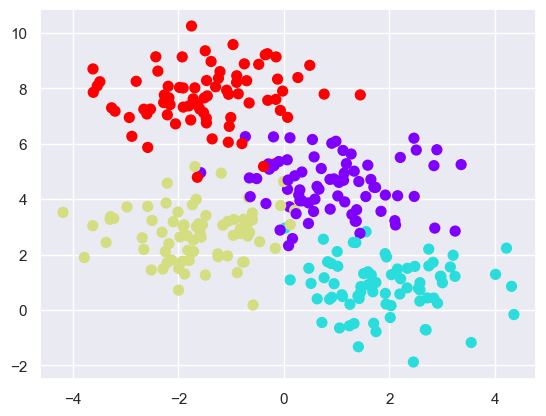

In [9]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='rainbow')

In [11]:
# The process of fitting a decision tree to our data can be done in scikit learn with
# decision tree classifier estimator

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(x, y)

In [13]:
# Write utility function to help us visualize the output of the classifier

In [17]:
def visualize_classifier(model, x, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()

    # Plot the training points
    ax.scatter(x[:, 0], x[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # fit the estimator
    model.fit(x, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
    z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

In [18]:
# Now we can visualize what the decision tree classification looks like

C:\Users\Family\AppData\Local\Temp\ipykernel_35388\1669497738.py:18: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5,


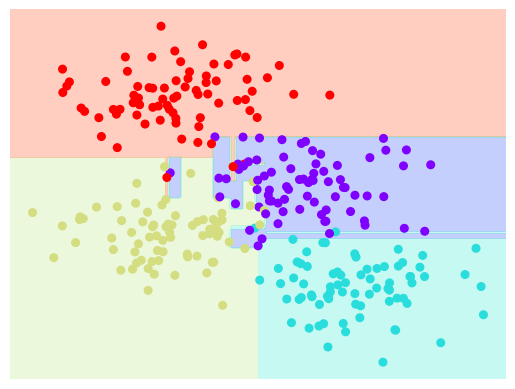

In [19]:
visualize_classifier(DecisionTreeClassifier(), x, y)

In [20]:
# ENSEMBLE OF ESTIMATORS : RANDOM FORESTS

In [21]:
# Multiple overfitting estimators can be combined to reduce the effect of this overfitting
# - is what underlines an ensemble method calle bagging

In [22]:
# Bagging makes use of ensemble of parellel estimators, each which overfits the data, and
# averages the results to find a better classification
# an ensemble of randomized decision tress is known as random forest

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

C:\Users\Family\AppData\Local\Temp\ipykernel_35388\1669497738.py:18: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5,


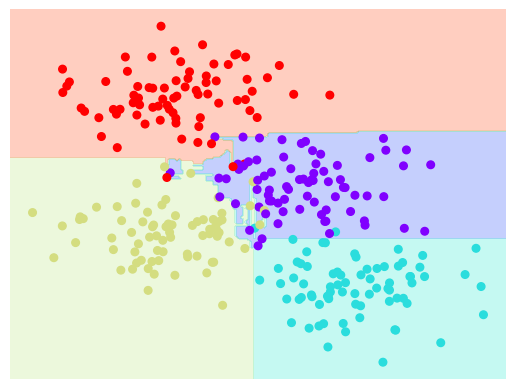

In [24]:
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
bag.fit(x, y)
visualize_classifier(bag, x, y)

In [26]:
# In sklearn such an optimized ensemble of randomized decision trees is implemented in the
# randomforesclassifier estimator, which takes care of all the randomization automatically
# all you need to do is select the number of estimators

In [27]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\Family\AppData\Local\Temp\ipykernel_35388\1669497738.py:18: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5,


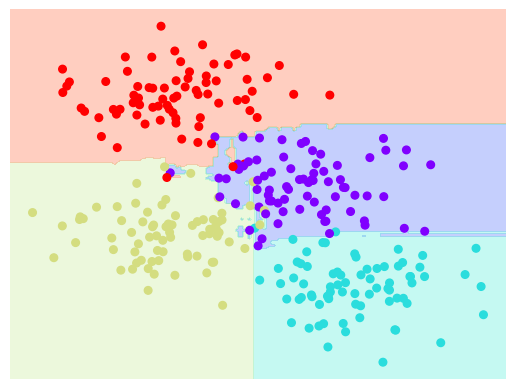

In [28]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, x, y)

In [29]:
#  We see that by averaging over 100 randomly purturbed model, we end up with
# an overall model that is much closer to our intuition about
# how the parameter space should be split

In [31]:
# RANDOM FOREST REGRESSION

In [32]:
rng = np.random.RandomState(42)
x = 10*rng.rand(200)

<ErrorbarContainer object of 3 artists>

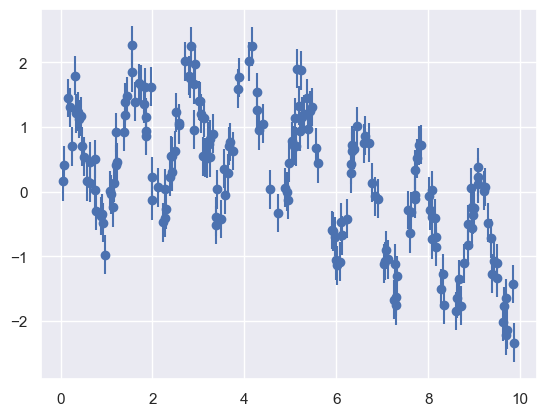

In [33]:
def model(x, sigma=0.3):
    fast_oscillation = np.sin(5*x)
    slow_oscillation = np.sin(0.5*x)
    noise = sigma*rng.randn(len(x))
    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o')

In [34]:
# Using the random forest regressor we can find the best fit curve as follows

In [35]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

RandomForestRegressor(n_estimators=200)

In [36]:
xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

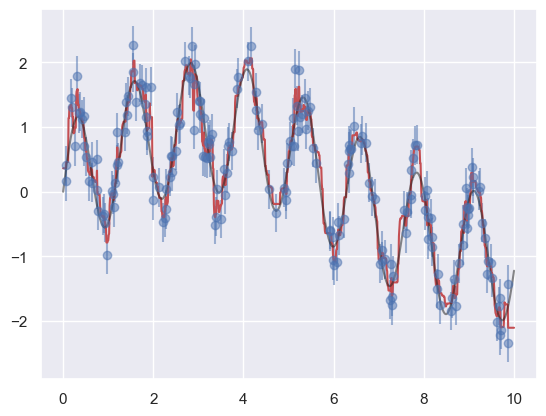

In [37]:
plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r')
plt.plot(xfit, ytrue, '-k', alpha=0.5)

In [38]:
# Here the true model is shown by the smooth curve , while the random forest model is shown
# by the jagged curve 